<a href="https://colab.research.google.com/github/ricky-kiva/ml-machine-beginner/blob/main/m6_l1_tensorflow_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Messy Room Classification using TensorFlow**

In [26]:
# import libraries
import tensorflow as tf
import zipfile
import os
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

print(tf.__version__)

2.13.0


Download dataset

In [6]:
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O './messy_vs_clean_room.zip'

--2023-09-14 07:42:59--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 205.185.216.42, 205.185.216.10
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|205.185.216.42|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘./messy_vs_clean_room.zip’

./messy_vs_clean_ro 100%[===================>]  67.13M   268MB/s    in 0.3s    

2023-09-14 07:42:59 (268 MB/s) - ‘./messy_vs_clean_room.zip’ saved [70392746/70392746]



Extract dataset

In [7]:
local_zip = './messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./data')

zip_ref.close()

Set dataset directory

In [8]:
base_dir = './data/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

Explore dataset

In [18]:
# explore train data classification
len_train_data = len(os.listdir(train_dir+"/clean")) + len(os.listdir(train_dir+"/messy"))
print(f'Number of train data: {len_train_data}')
os.listdir(train_dir)

Number of train data: 192


['clean', 'messy']

In [19]:
# explore validation data classification
len_val_data = len(os.listdir(validation_dir+"/clean")) + len(os.listdir(validation_dir+"/messy"))
print(f'Number of validation data: {len_val_data}')
os.listdir(validation_dir)

Number of validation data: 20


['clean', 'messy']

Build image data generator

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20, # randomly rotate the images by up to 20 deg
    horizontal_flip=True, # randomly flip images horizontally
    shear_range=0.2, # randomly shifts pixels along the axis with max intensity of 0.2
    fill_mode='nearest' # fill empty spaces from rotation/shear by the nearest pixel
)

validation_datagen = ImageDataGenerator(rescale=1/255)

Flow the data to the generator

In [61]:
train_generator = train_datagen.flow_from_directory(
    train_dir, # set train data directory
    target_size=(150, 150), # resize to 150x150 px
    batch_size=4,
    class_mode='binary' # because it's 2 class classification
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=4,
    class_mode='binary'
)

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


Make the model

In [72]:
model = tf.keras.models.Sequential([
    # convolutional layers
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # multi layer perceptron (MLP) / fully connected layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# get the summary of the model
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 74, 74, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_24 (Conv2D)          (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 36, 36, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 17, 17, 128)      

Compile the model

In [73]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

Train the model

In [74]:
model.fit(
    train_generator,
    steps_per_epoch=48,
    epochs=25,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/25
48/48 - 4s - loss: 0.8006 - accuracy: 0.5521 - val_loss: 0.6346 - val_accuracy: 0.5000 - 4s/epoch - 79ms/step
Epoch 2/25
48/48 - 2s - loss: 0.6664 - accuracy: 0.5938 - val_loss: 0.5263 - val_accuracy: 0.8500 - 2s/epoch - 35ms/step
Epoch 3/25
48/48 - 2s - loss: 0.6016 - accuracy: 0.6823 - val_loss: 0.4903 - val_accuracy: 0.8000 - 2s/epoch - 44ms/step
Epoch 4/25
48/48 - 3s - loss: 0.6673 - accuracy: 0.6458 - val_loss: 0.6188 - val_accuracy: 0.6500 - 3s/epoch - 54ms/step
Epoch 5/25
48/48 - 2s - loss: 0.5908 - accuracy: 0.7031 - val_loss: 0.6455 - val_accuracy: 0.7000 - 2s/epoch - 38ms/step
Epoch 6/25
48/48 - 2s - loss: 0.6038 - accuracy: 0.6510 - val_loss: 0.5880 - val_accuracy: 0.6500 - 2s/epoch - 35ms/step
Epoch 7/25
48/48 - 2s - loss: 0.5262 - accuracy: 0.7448 - val_loss: 0.4866 - val_accuracy: 0.8000 - 2s/epoch - 36ms/step
Epoch 8/25
48/48 - 2s - loss: 0.5028 - accuracy: 0.7656 - val_loss: 0.6172 - val_accuracy: 0.6500 - 2s/epoch - 35ms/step
Epoch 9/25
48/48 - 2s - loss: 0.

Get class indices

In [75]:
print(train_generator.class_indices)

{'clean': 0, 'messy': 1}


Predicting some images

Saving Capture_3.JPG to Capture_3 (5).JPG
1/1 [==============================] - 0s 73ms/step
clean


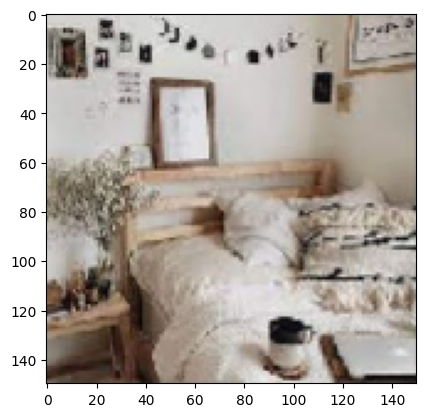

In [76]:
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg

# open upload prompt
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  if classes == 0:
    print('clean')
  else:
    print('messy')

Test model on *test set*

1/1 [==============================] - 0s 18ms/step


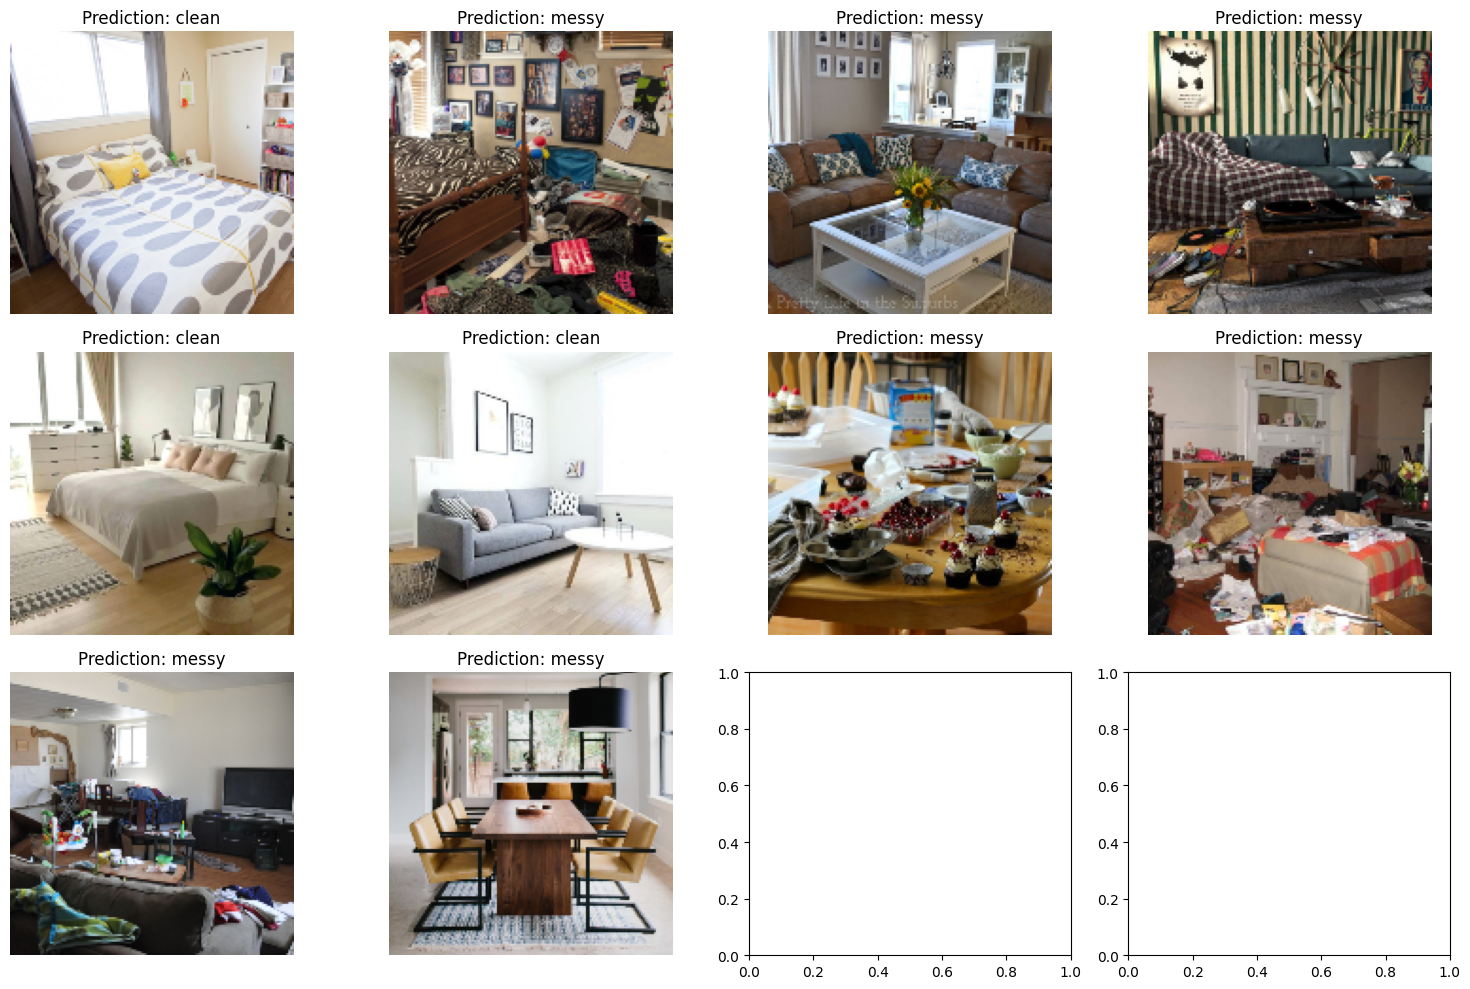

In [77]:
def predict_images_and_display(model):
    test_dir = './data/images/test'
    fig, axes = plt.subplots(3, 4, figsize=(15, 10))

    for i, filename in enumerate(os.listdir(test_dir)[:10]):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            img_path = os.path.join(test_dir, filename)
            img = image.load_img(img_path, target_size=(150, 150))
            x = image.img_to_array(img)
            x = np.expand_dims(x, axis=0)
            images = np.vstack([x])

            classes = model.predict(images, batch_size=10)
            prediction = 'clean' if classes == 0 else 'messy'

            ax = axes[i // 4, i % 4]
            ax.imshow(img)
            ax.set_title(f'Prediction: {prediction}')
            ax.axis('off')

    plt.tight_layout()
    plt.show()

predict_images_and_display(model)